In [1]:
#tem packages a mais pq nqs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import os
from sklearn.preprocessing import StandardScaler
from datetime import date
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv('data_cluster.csv')
df

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,3,2,4,3,4,5,1,3,4,3
15585,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,5,3,5,5,3,1,3,4,4,5
15586,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,3,4,5,4,4,4,4,5,4,4
15587,nochurn,Mr. Gregory Moran,yes,1992.0,leisure,double,5155,4,3,4,...,5,4,5,5,2,5,4,3,4,5


In [3]:
df.drop_duplicates(inplace = True)

In [4]:
cl = df[['Name', 'Year_Birth', 'TypeTravel', 'RewardPoints']]

In [6]:
cl.insert(0, 'ID', range(1, 1 + len(df)))
cl.set_index('ID')

,Name,Year_Birth,TypeTravel,RewardPoints
ID,,,,
1,Ms. Nicole Clarke,1974.0,business,4907
2,Mr. Jesse Scott,1965.0,business,6724
3,Mr. Christopher Carter,1973.0,business,4365
4,Ms. Jennifer Morgan,1993.0,leisure,3849
5,Mr. Michael White,1989.0,business,5376
...,...,...,...,...
15582,Ms. Wendy Roberts,1988.0,business,4968
15583,Ms. Sonya Smith,2000.0,business,4970
15584,Mr. Maxwell Wright,1964.0,business,4046


In [7]:
cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15586 entries, 0 to 15588
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            15586 non-null  int64  
 1   Name          15586 non-null  object 
 2   Year_Birth    15391 non-null  float64
 3   TypeTravel    15586 non-null  object 
 4   RewardPoints  15586 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 730.6+ KB


In [8]:
cl['Year_Birth'].fillna(cl['Year_Birth'].median(), inplace = True)

C:\Users\m13ar\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

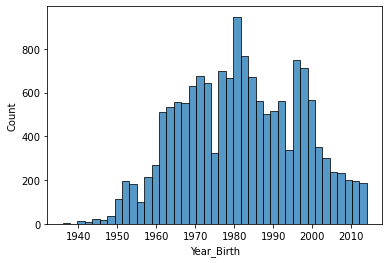

In [9]:
sns.histplot(data=cl, x='Year_Birth')

In [10]:
cl['Age'] = date.today().year - cl['Year_Birth']

C:\Users\m13ar\AppData\Local\Temp/ipykernel_6864/1203197796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl['Age'] = date.today().year - cl['Year_Birth']


In [11]:
cl.corr()

,ID,Year_Birth,RewardPoints,Age
ID,1.000000,0.006460,-0.019138,-0.006460
Year_Birth,0.006460,1.000000,-0.236962,-1.000000
RewardPoints,-0.019138,-0.236962,1.000000,0.236962
Age,-0.006460,-1.000000,0.236962,1.000000


In [12]:
cl['Gender'] = cl['Name'].str.slice(0,3)

C:\Users\m13ar\AppData\Local\Temp/ipykernel_6864/116154644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl['Gender'] = cl['Name'].str.slice(0,3)


In [14]:
cl.drop (columns = ['Name', 'Year_Birth'], inplace = True)

C:\Users\m13ar\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
cl.replace({"Gender": {"Mr.": "M", "Ms.": "F"}})

,ID,TypeTravel,RewardPoints,Age,Gender
0,1,business,4907,48.0,F
1,2,business,6724,57.0,M
2,3,business,4365,49.0,M
3,4,leisure,3849,29.0,F
4,5,business,5376,33.0,M
...,...,...,...,...,...
15584,15582,business,4968,34.0,F
15585,15583,business,4970,22.0,F
15586,15584,business,4046,58.0,M
15587,15585,leisure,5155,30.0,M


<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

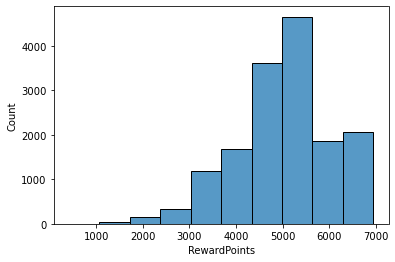

In [17]:
sns.histplot(data=cl, x='RewardPoints', bins=10)

In [21]:
cl2 = pd.get_dummies(cl, columns = ['Gender', 'TypeTravel'], drop_first = True)

In [22]:
cl2.corr()

,ID,RewardPoints,Age,Gender_Ms.,TypeTravel_leisure
ID,1.000000,-0.019138,-0.006460,0.004832,0.005574
RewardPoints,-0.019138,1.000000,0.236962,0.114581,0.129581
Age,-0.006460,0.236962,1.000000,-0.011788,-0.040494
Gender_Ms.,0.004832,0.114581,-0.011788,1.000000,-0.005160
TypeTravel_leisure,0.005574,0.129581,-0.040494,-0.005160,1.000000


In [23]:
cl2.set_index('ID')

,RewardPoints,Age,Gender_Ms.,TypeTravel_leisure
ID,,,,
1,4907,48.0,1,0
2,6724,57.0,0,0
3,4365,49.0,0,0
4,3849,29.0,1,1
5,5376,33.0,0,0
...,...,...,...,...
15582,4968,34.0,1,0
15583,4970,22.0,1,0
15584,4046,58.0,0,0


Text(0.5, 1.0, 'Correlation Heats')

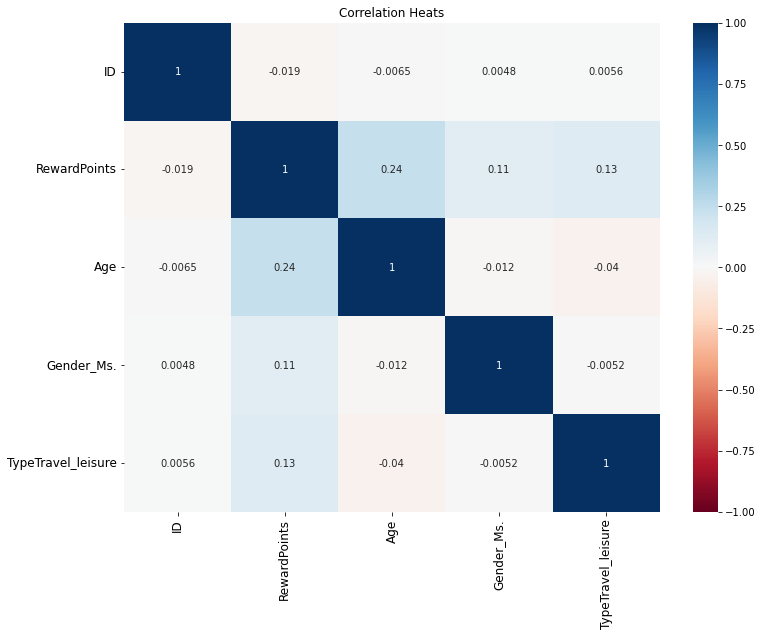

In [24]:
plt.figure(figsize=(12,9))
s= sns.heatmap(cl2.corr(),
               annot=True,
               cmap='RdBu',
               vmin=-1,
               vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
plt.title('Correlation Heats')

In [25]:
scaler = StandardScaler()
cl2_stand = scaler.fit_transform(cl2)

In [26]:
cl2_stand

array([[-1.73193968, -0.11228503,  0.51025393,  0.97603455, -0.67031424],
       [-1.73171743,  1.65538436,  1.10690421, -1.02455389, -0.67031424],
       [-1.73149517, -0.63957001,  0.57654841, -1.02455389, -0.67031424],
       ...,
       [ 1.73149517, -0.94990932,  1.17319868, -1.02455389, -0.67031424],
       [ 1.73171743,  0.1289819 , -0.68304662, -1.02455389,  1.49183762],
       [ 1.73193968,  0.11049774, -0.08639634, -1.02455389, -0.67031424]])

In [27]:
hier_clust = linkage(cl2_stand, method = 'ward')

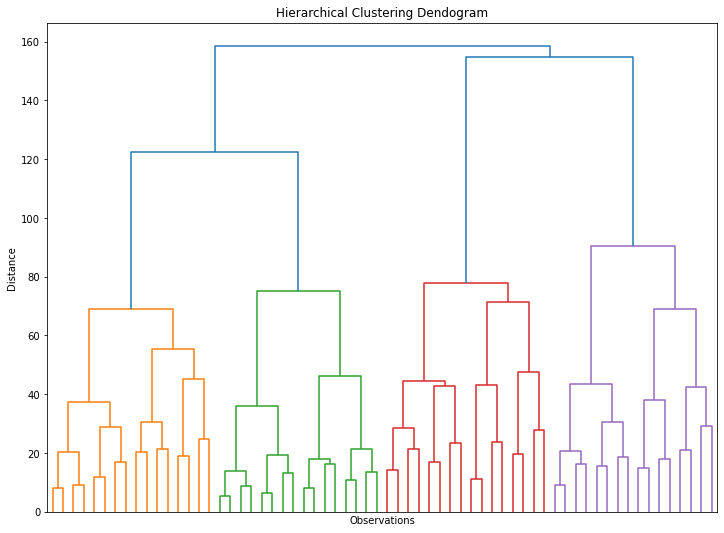

In [28]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
         truncate_mode = 'level',
         p=5,
         show_leaf_counts= False,
         no_labels= True)
         #color_threshold= 0)

plt.show()

In [29]:
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

In [30]:
ssd = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(cl2_stand)
    
    
    ssd.append(model.inertia_) ##SSD point to cluster center

In [31]:
ssd

[62055.83522834317,
 51267.502193574444,
 45524.399186106326,
 40980.45557650406,
 37034.96524369687,
 33858.773408369074,
 30968.571022958808,
 28339.12879270873]

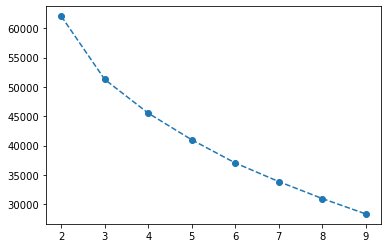

In [32]:
plt.plot(range(2,10), ssd, 'o--')

<AxesSubplot:>

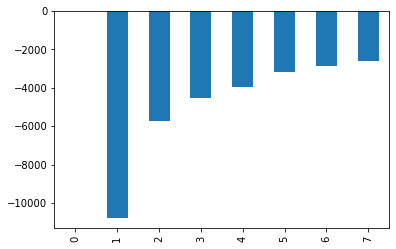

In [33]:
pd.Series(ssd).diff().plot(kind='bar')

In [53]:
model = KMeans(n_clusters=4)

In [54]:
cluster_labels = model.fit_predict(cl2_stand)

In [55]:
cluster_labels

array([0, 2, 2, ..., 2, 1, 2])

In [56]:
cl2['Cluster'] = cluster_labels

In [57]:
cl2

,ID,RewardPoints,Age,Gender_Ms.,TypeTravel_leisure,Cluster,Labels
0,1,4907,48.0,1,0,0,Middle Age Working Men
1,2,6724,57.0,0,0,2,Young Males on Leisure
2,3,4365,49.0,0,0,2,Young Males on Leisure
3,4,3849,29.0,1,1,1,Older Age Female on Leisure
4,5,5376,33.0,0,0,2,Young Males on Leisure
...,...,...,...,...,...,...,...
15584,15582,4968,34.0,1,0,0,Middle Age Working Men
15585,15583,4970,22.0,1,0,0,Middle Age Working Men
15586,15584,4046,58.0,0,0,2,Young Males on Leisure
15587,15585,5155,30.0,0,1,1,Older Age Female on Leisure


In [58]:
cl2.corr()['Cluster'].iloc[:-1].sort_values()

Gender_Ms.           -0.615903
ID                   -0.009203
RewardPoints          0.121434
Age                   0.295321
TypeTravel_leisure    0.412906
Name: Cluster, dtype: float64

<AxesSubplot:>

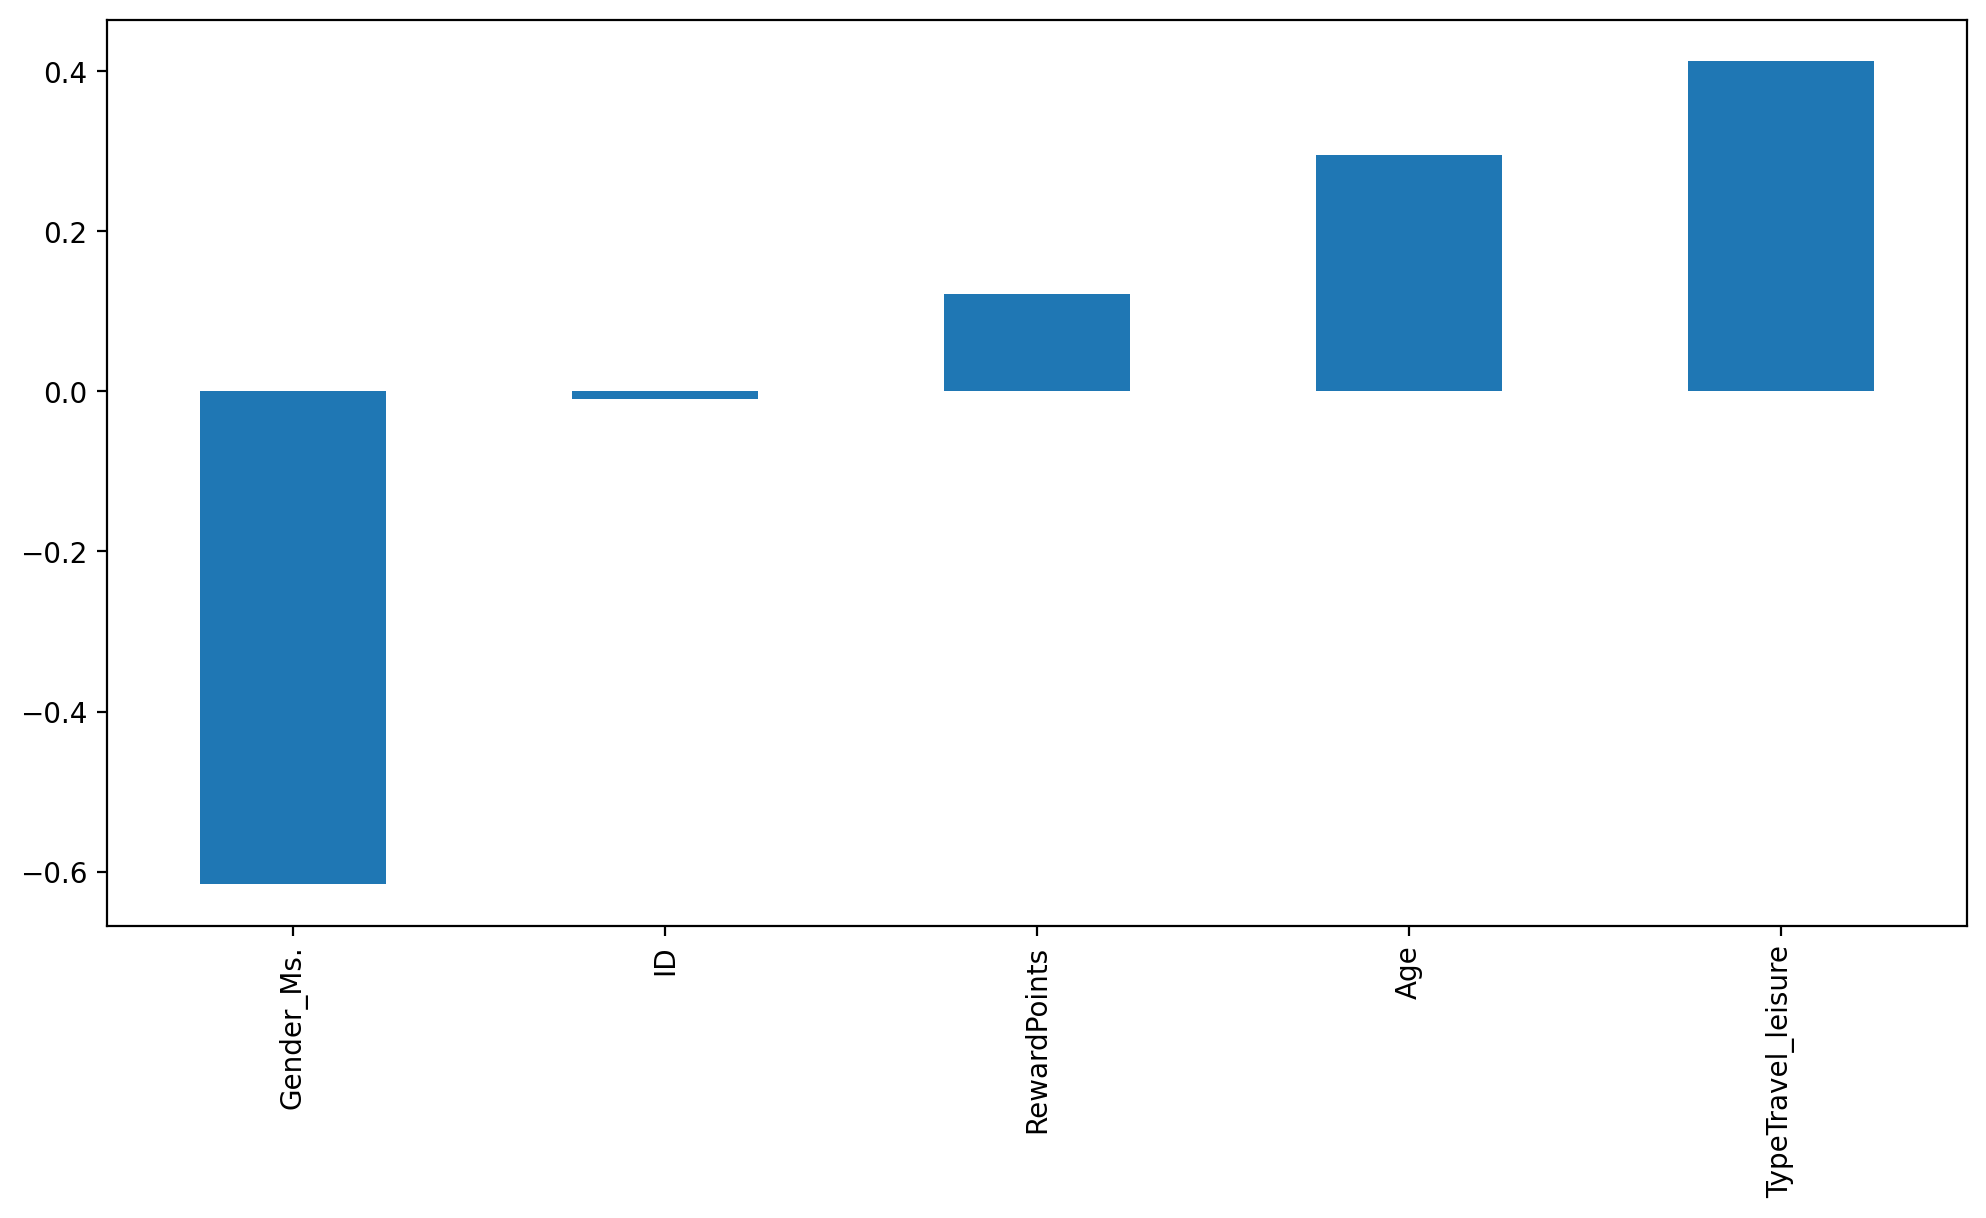

In [59]:
plt.figure(figsize=(12,6), dpi=200)
cl2.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

In [60]:
cl2

,ID,RewardPoints,Age,Gender_Ms.,TypeTravel_leisure,Cluster,Labels
0,1,4907,48.0,1,0,0,Middle Age Working Men
1,2,6724,57.0,0,0,2,Young Males on Leisure
2,3,4365,49.0,0,0,2,Young Males on Leisure
3,4,3849,29.0,1,1,1,Older Age Female on Leisure
4,5,5376,33.0,0,0,2,Young Males on Leisure
...,...,...,...,...,...,...,...
15584,15582,4968,34.0,1,0,0,Middle Age Working Men
15585,15583,4970,22.0,1,0,0,Middle Age Working Men
15586,15584,4046,58.0,0,0,2,Young Males on Leisure
15587,15585,5155,30.0,0,1,1,Older Age Female on Leisure


In [61]:
cl3 = cl2.groupby(['Cluster']).mean()

In [62]:
cl3

,ID,RewardPoints,Age,Gender_Ms.,TypeTravel_leisure
Cluster,,,,,
0,7797.977883,4981.870740,40.263234,1.000000,0.000000
1,7957.096749,4881.595559,24.486122,0.487312,1.000000
2,7757.097206,4877.724455,41.099502,0.000000,0.000000
3,7687.104651,5597.349268,55.785530,0.532730,0.994832


In [63]:
cl3['nob'] = cl2[['Cluster', 'Gender_Ms.']].groupby(['Cluster']).count()

In [64]:
cl3

,ID,RewardPoints,Age,Gender_Ms.,TypeTravel_leisure,nob
Cluster,,,,,,
0,7797.977883,4981.870740,40.263234,1.000000,0.000000,5516
1,7957.096749,4881.595559,24.486122,0.487312,1.000000,2522
2,7757.097206,4877.724455,41.099502,0.000000,0.000000,5226
3,7687.104651,5597.349268,55.785530,0.532730,0.994832,2322


In [65]:
cl3['pobs'] = cl3['nob']/cl3['nob'].sum()

### 

In [66]:
cl3

,ID,RewardPoints,Age,Gender_Ms.,TypeTravel_leisure,nob,pobs
Cluster,,,,,,,
0,7797.977883,4981.870740,40.263234,1.000000,0.000000,5516,0.353907
1,7957.096749,4881.595559,24.486122,0.487312,1.000000,2522,0.161812
2,7757.097206,4877.724455,41.099502,0.000000,0.000000,5226,0.335301
3,7687.104651,5597.349268,55.785530,0.532730,0.994832,2322,0.148980


In [67]:
#pode estar tudo trocado por correr o codigo
cl3.rename({0: 'Middle Age Working Men',
           3:'Young Males on Leisure',
           1: 'Middle Age Working Female',
           2: 'Older Age Female on Leisure'})

,ID,RewardPoints,Age,Gender_Ms.,TypeTravel_leisure,nob,pobs
Cluster,,,,,,,
Middle Age Working Men,7797.977883,4981.870740,40.263234,1.000000,0.000000,5516,0.353907
Middle Age Working Female,7957.096749,4881.595559,24.486122,0.487312,1.000000,2522,0.161812
Older Age Female on Leisure,7757.097206,4877.724455,41.099502,0.000000,0.000000,5226,0.335301
Young Males on Leisure,7687.104651,5597.349268,55.785530,0.532730,0.994832,2322,0.148980


In [68]:
# droppar os RewardPoints aqui, n fazem nada
cl3 = cl3.rename_axis('Labels').reset_index()

In [69]:
cl2['Labels'] = cl2['Cluster'].map({0: 'Middle Age Working Men',
           3:'Young Males on Leisure',
           1: 'Middle Age Working Female',
           2: 'Older Age Female on Leisure'})

In [70]:
cl2

,ID,RewardPoints,Age,Gender_Ms.,TypeTravel_leisure,Cluster,Labels
0,1,4907,48.0,1,0,0,Middle Age Working Men
1,2,6724,57.0,0,0,2,Older Age Female on Leisure
2,3,4365,49.0,0,0,2,Older Age Female on Leisure
3,4,3849,29.0,1,1,1,Middle Age Working Female
4,5,5376,33.0,0,0,2,Older Age Female on Leisure
...,...,...,...,...,...,...,...
15584,15582,4968,34.0,1,0,0,Middle Age Working Men
15585,15583,4970,22.0,1,0,0,Middle Age Working Men
15586,15584,4046,58.0,0,0,2,Older Age Female on Leisure
15587,15585,5155,30.0,0,1,1,Middle Age Working Female


In [72]:
cluster0 = cl2[cl2.Cluster==0]
cluster1 = cl2[cl2.Cluster==1]
cluster2 = cl2[cl2.Cluster==2]
cluster3 = cl2[cl2.Cluster==3]


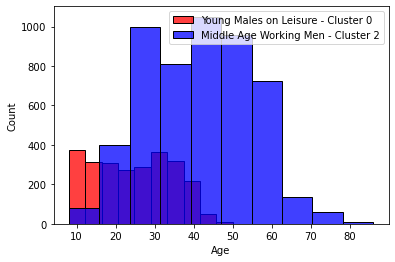

In [81]:
sns.histplot(cluster1['Age'],color='red',label='Young Males on Leisure - Cluster 0', bins = 10)

sns.histplot(cluster2['Age'],color='blue',label='Middle Age Working Men - Cluster 2', bins = 10)

plt.legend()

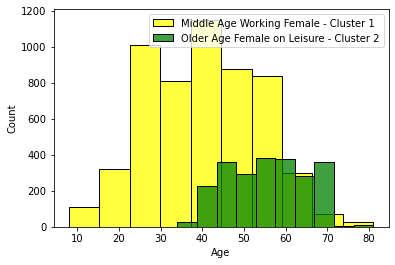

In [84]:
sns.histplot(cluster0['Age'],color='yellow',label='Middle Age Working Female - Cluster 1', bins = 10)
sns.histplot(cluster3['Age'],color='green',label='Older Age Female on Leisure - Cluster 2', bins = 10)
plt.legend()

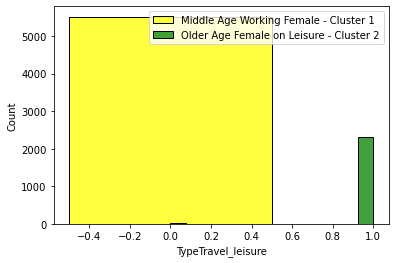

In [92]:
sns.histplot(cluster0['TypeTravel_leisure'],color='yellow',label='Middle Age Working Female - Cluster 1')
sns.histplot(cluster3['TypeTravel_leisure'],color='green',label='Older Age Female on Leisure - Cluster 2')
plt.legend()

No handles with labels found to put in legend.


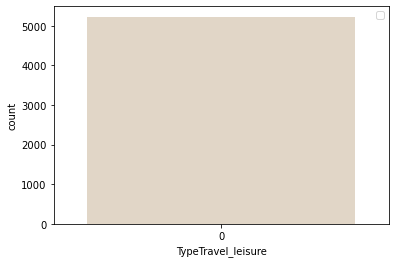

In [101]:
sns.countplot(x=cluster2['TypeTravel_leisure'], palette="ch:.25", data=cluster2)
plt.legend()

No handles with labels found to put in legend.


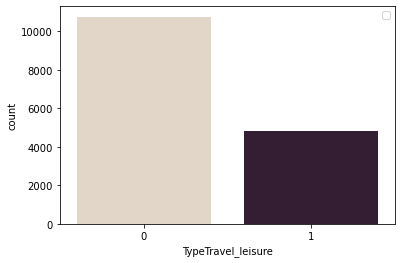

In [99]:
sns.countplot(x=cl2['TypeTravel_leisure'], palette="ch:.25", data=cluster3)
plt.legend()